In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
np.random.seed(0)
prices = np.random.lognormal(mean=0.001, sigma=0.02, size=len(dates)) * 100
df = pd.DataFrame({'Fecha': dates, 'Precio_Cierre': prices})
df.set_index('Fecha', inplace=True)
df.head()

,Precio_Cierre
Fecha,
2023-01-01,103.694724
2023-01-02,100.904379
2023-01-03,102.078788
2023-01-04,104.688372
2023-01-05,103.909606


In [3]:
df.describe()

,Precio_Cierre
count,100.000000
mean,100.240221
std,2.031007
min,95.117255
25%,98.819317
50%,100.288623
75%,101.586614
max,104.748818


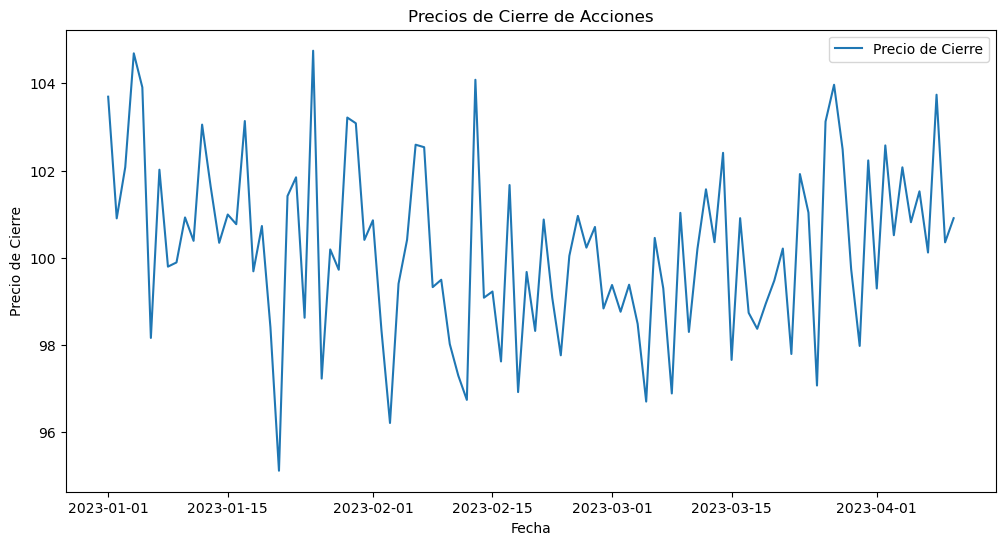

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Precio_Cierre'], label='Precio de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Precios de Cierre de Acciones')
plt.legend()
plt.show()

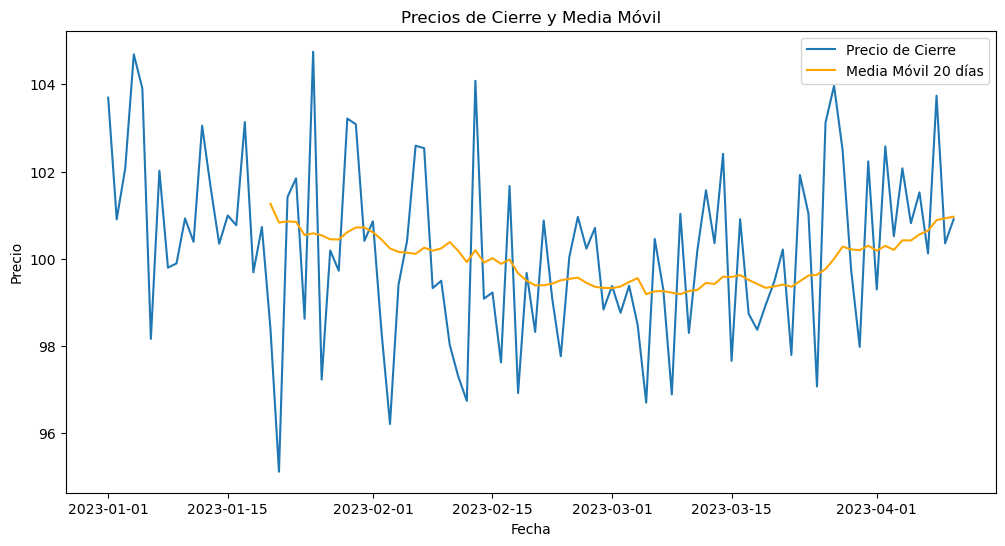

In [5]:
df['Media_Movil_20'] = df['Precio_Cierre'].rolling(window=20).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Precio_Cierre'], label='Precio de Cierre')
plt.plot(df.index, df['Media_Movil_20'], label='Media Móvil 20 días', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precios de Cierre y Media Móvil')
plt.legend()
plt.show()

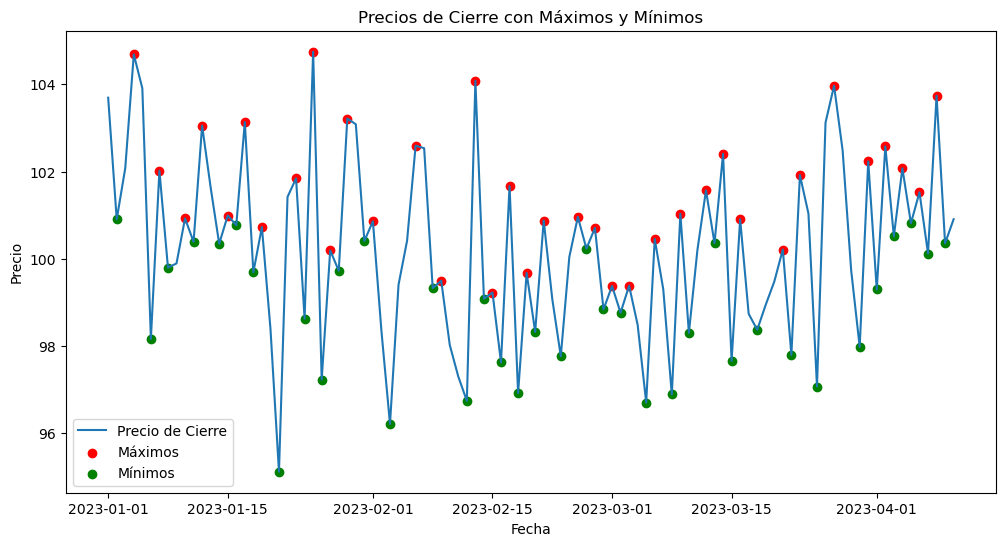

In [6]:
df['Maximos'] = df['Precio_Cierre'][(df['Precio_Cierre'] > df['Precio_Cierre'].shift(1)) & (df['Precio_Cierre'] > df['Precio_Cierre'].shift(-1))]
df['Minimos'] = df['Precio_Cierre'][(df['Precio_Cierre'] < df['Precio_Cierre'].shift(1)) & (df['Precio_Cierre'] < df['Precio_Cierre'].shift(-1))]
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Precio_Cierre'], label='Precio de Cierre')
plt.scatter(df.index, df['Maximos'], label='Máximos', color='red')
plt.scatter(df.index, df['Minimos'], label='Mínimos', color='green')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precios de Cierre con Máximos y Mínimos')
plt.legend()
plt.show()